In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [255]:
#####################################
#####################################
def plotBonduary(fileName):
    x, y, flag, vx, vy, Dxx, Dxy, Dyy, prevVal, currVal, nextVal = np.loadtxt(fname=fileName, unpack=True, skiprows=0)

    flag = np.reshape(flag, (int(x.max())+2, int(y.max())+2))
    x = np.arange(int(x.max())+2)
    y = np.arange(int(y.max())+2)

    fig, ax = plt.subplots(figsize=(10,7))
    ax.contour(x, y, flag, levels=levels, cmap="rainbow")
    
    ax.set_xlim([-1, x.max()+1])
    ax.set_ylim([-1, y.max()+1])
    
    return fig, ax
#####################################
#####################################
def plotVelocity(fileName, axis):    
    x, y, flag, vx, vy, Dxx, Dxy, Dyy, prevVal, currVal, nextVal = np.loadtxt(fname=fileName, unpack=True, skiprows=0)

    vx = np.reshape(vx, (int(x.max())+2, int(y.max())+2))
    vy = np.reshape(vy, (int(x.max())+2, int(y.max())+2))
    x = np.arange(int(x.max())+2)
    y = np.arange(int(y.max())+2)

    sampling = 10
    x_subsample = x[::sampling]
    y_subsample = y[::sampling]

    vx_subsample = vx[::sampling,::sampling]
    vy_subsample = vy[::sampling,::sampling]

    myQuiver = axis.quiver(x_subsample, y_subsample, vx_subsample, vy_subsample, units='xy', scale=0.05)
    #axis.streamplot(x_subsample, y_subsample, vx_subsample, vy_subsample, density=[0.5, 1])
    axis.quiverkey(myQuiver, X=0.9, Y=1.1, U=10,
                 label='Quiver key, length = 10', labelpos='E', coordinates='figure')
#####################################
#####################################
def plotConcentration(fileName, figure, axis):
    
    x, y, z = np.loadtxt(fname=fileName, unpack=True, skiprows=1)
    levels = np.arange(0.1*z.max(), 1.1*z.max(), step=z.max()/10)

    z = np.reshape(z, (int(x.max())+2, int(y.max())+2))
    x = np.arange(int(x.max())+2)
    y = np.arange(int(y.max())+2)

    print("z max:",z.max())
    
    myContours = axis.contourf(x, y, z, levels=levels, cmap="rainbow")
    axis.clabel(CS, inline=True, fontsize=10)
    cbar = figure.colorbar(myContours)
    cbar.ax.set_ylabel('concentration')
#####################################
#####################################   

/tmp/ipykernel_34/3908843233.py:43: RuntimeWarning: invalid value encountered in double_scalars
  levels = np.arange(0.1*z.max(), 1.1*z.max(), step=z.max()/10)


ValueError: arange: cannot compute length

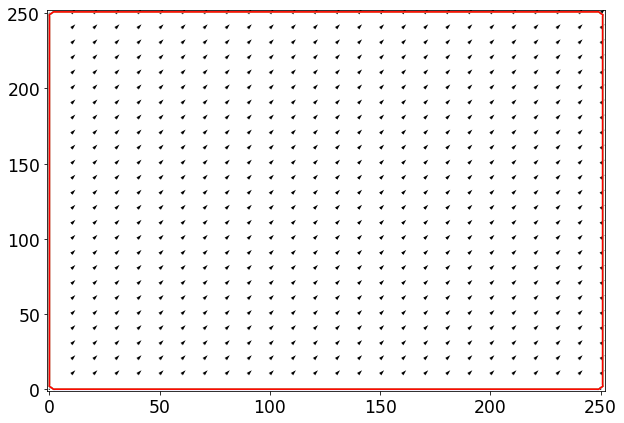

In [257]:
fileName = "/scratch/akalinow/Monika/RMM/test/grid14_1_all.dat"
fig, ax = plotBonduary(fileName)  
plotVelocity(fileName, ax)

fileName = "/scratch/akalinow/Monika/RMM/test/grid14_1_Conc_adi_0.dat"
#plotConcentration(fileName, fig, ax)

fileName = "/scratch/akalinow/Monika/RMM/test/grid14_1_Conc_adi_90.dat"
plotConcentration(fileName, fig, ax)

##Adjust plot settings
ax.set_xlim([50, 150])
ax.set_ylim([50, 150])
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
fig.savefig("concentrationPlot.png", dpi=150)